# Humza Khalid, 11-7-2025

-_Real Madrid League Soccer Analysis (2024-2025)_

-_Web Scraping and Data Analysis Project_

-_This analysis project scrapes data from a website and creates visual  data analysis amongst the questions being given._

In [26]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import io
warnings.filterwarnings('ignore')


sns.set_style("whitegrid")
sns.set_palette("husl")

In [27]:
url = "https://en.wikipedia.org/wiki/2024%E2%80%9325_Real_Madrid_CF_season"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0.0.0 Safari/537.36"
}


In [28]:
# Define the file name
FILE_NAME = "all_reorganized_tables.csv"

# --- 1. Load the original file and clean the Player Statistics Table (Table_94) ---

try:
    df = pd.read_csv(FILE_NAME)
except FileNotFoundError:
    print(f"Error: File '{FILE_NAME}' not found.")
    exit()

# Filter for the Player Statistics table (identified as 'Table_94')
df_stats = df[df['Source_Table_ID'] == 'Table_94'].copy()

# Rename the relevant columns based on the structure of Table_94
stat_cols = {
    'Name': 'Player Name',
    'Total': 'Total Apps',
    'Total_1': 'Total G',
    'Total_2': 'Total A'
}

# Select and rename columns
df_stats = df_stats.rename(columns=stat_cols)
df_stats = df_stats[['Player Name', 'Total Apps', 'Total G', 'Total A']].copy()

# Clean and convert statistical columns to numeric
numeric_cols = ['Total Apps', 'Total G', 'Total A']
for col in numeric_cols:
    # Remove non-numeric characters (like reference tags [X]) before conversion
    df_stats[col] = df_stats[col].astype(str).str.replace(r'\[\w+\]|\(c\)', '', regex=True).str.strip()
    df_stats[col] = pd.to_numeric(df_stats[col], errors='coerce')

# Drop empty rows and fill NaN values in Apps/Assists with 0
df_stats.dropna(subset=['Total Apps', 'Total G', 'Total A'], how='all', inplace=True)
df_stats['Total Apps'] = df_stats['Total Apps'].fillna(0)
df_stats['Total A'] = df_stats['Total A'].fillna(0)
df_stats = df_stats.reset_index(drop=True)

print("✅ Data cleaning complete. Starting analysis and plotting...")


✅ Data cleaning complete. Starting analysis and plotting...



_Question 1) Which Player has made total appearances throughout the whole season?_


--- Question 1: Top 5 Players by Total Appearances ---
            Player Name  Total Apps
1       Vinícius Júnior        16.0
0       Jude Bellingham        12.0
9   Aurélien Tchouaméni        11.0
10          Luka Modrić        10.0
2         Lucas Vázquez         9.0


<function matplotlib.pyplot.show(close=None, block=None)>

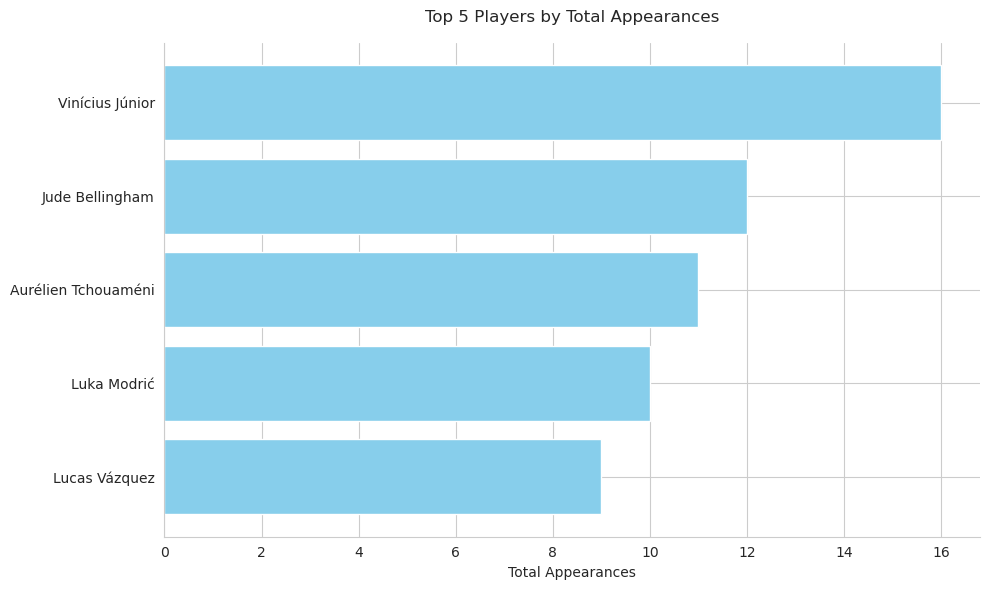

In [30]:
# --- 2. Question 1: Top 5 Players by Total Appearances ---

print("\n--- Question 1: Top 5 Players by Total Appearances ---")
top_appearances = df_stats.sort_values(by='Total Apps', ascending=False).head(5)
print(top_appearances[['Player Name', 'Total Apps']])

# Matplotlib Code (Horizontal Bar Chart)
plt.figure(figsize=(10, 6))
plot_data_q1 = top_appearances.sort_values(by='Total Apps', ascending=True)
plt.barh(plot_data_q1['Player Name'], plot_data_q1['Total Apps'], color='skyblue')
plt.xlabel('Total Appearances')
plt.title('Top 5 Players by Total Appearances', pad=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show


_This plot retrieves Vinicius Junior who has made the most appearances through the whole season._


_Question 2) Which Player has made the  most assists throughout season?_


--- Question 2: Top Players by Total Assists ---
       Player Name  Total A
0  Jude Bellingham      2.0
1  Vinícius Júnior      1.0
2    Lucas Vázquez      1.0
3     Raúl Asencio      1.0
4  Antonio Rüdiger      1.0


<function matplotlib.pyplot.show(close=None, block=None)>

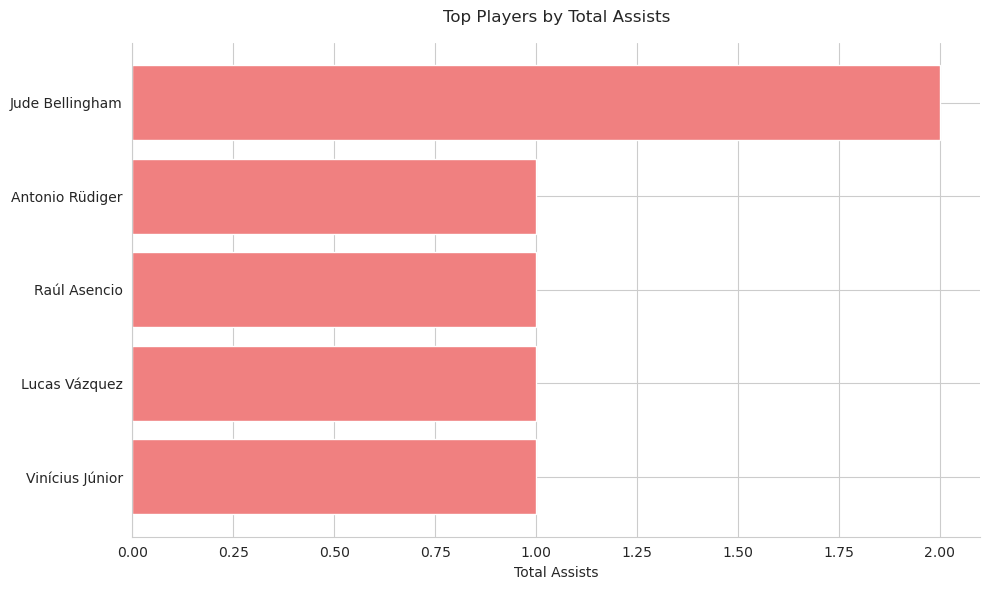

In [22]:
print("\n--- Question 2: Top Players by Total Assists ---")
df_assists = df_stats[df_stats['Total A'] > 0].copy()
top_assists = df_assists.sort_values(by='Total A', ascending=False).head(5)
print(top_assists[['Player Name', 'Total A']])


plt.figure(figsize=(10, 6))
plot_data_q2 = top_assists.sort_values(by='Total A', ascending=True)
plt.barh(plot_data_q2['Player Name'], plot_data_q2['Total A'], color='lightcoral')
plt.xlabel('Total Assists')
plt.title('Top Players by Total Assists', pad=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show

_This plot demonstrates Jude Bellingham has made the most assists throughout the entirety  of 2024- 2025 season ._

_Question 3) How is the Distribution of number of  players compared to  how many games they played?_


--- Question 3: Distribution of Total Appearances (Descriptive Stats) ---
count    21.000000
mean      5.523810
std       4.226335
min       0.000000
25%       2.000000
50%       5.000000
75%       8.000000
max      16.000000
Name: Total Apps, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

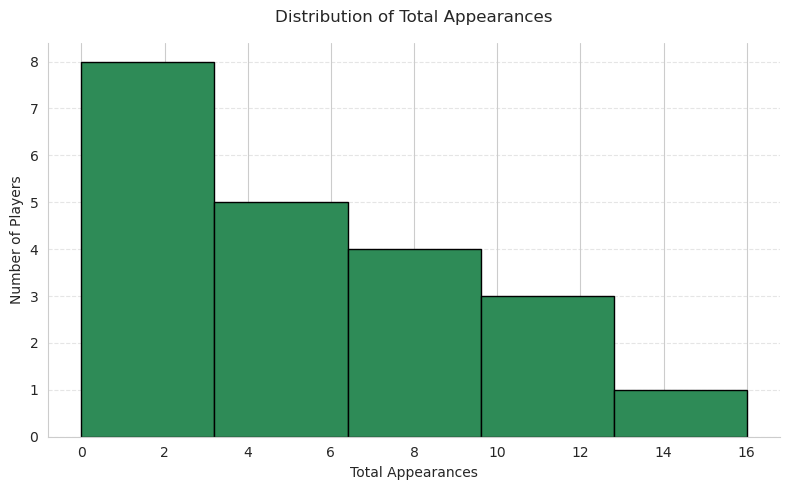

In [38]:


print("\n--- Question 3: Distribution of Total Appearances (Descriptive Stats) ---")
stats_apps = df_stats['Total Apps'].describe()
print(stats_apps)

# Matplotlib Code (Histogram)
plt.figure(figsize=(8, 5))
plt.hist(df_stats['Total Apps'], bins=5, edgecolor='black', color='seagreen')
plt.xlabel('Total Appearances')
plt.ylabel('Number of Players')
plt.title('Distribution of Total Appearances', pad=15)
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show


_This plot shows the number of players that played how many games ._

_Question 4) What percentage of players played more than 10 games vs less than 10 games?_


--- Question 4: Proportion of Squad > 10 Apps ---
Total Players: 21
Players with > 10 Total Apps: 3
Proportion of players with > 10 Total Apps: 14.29%


<function matplotlib.pyplot.show(close=None, block=None)>

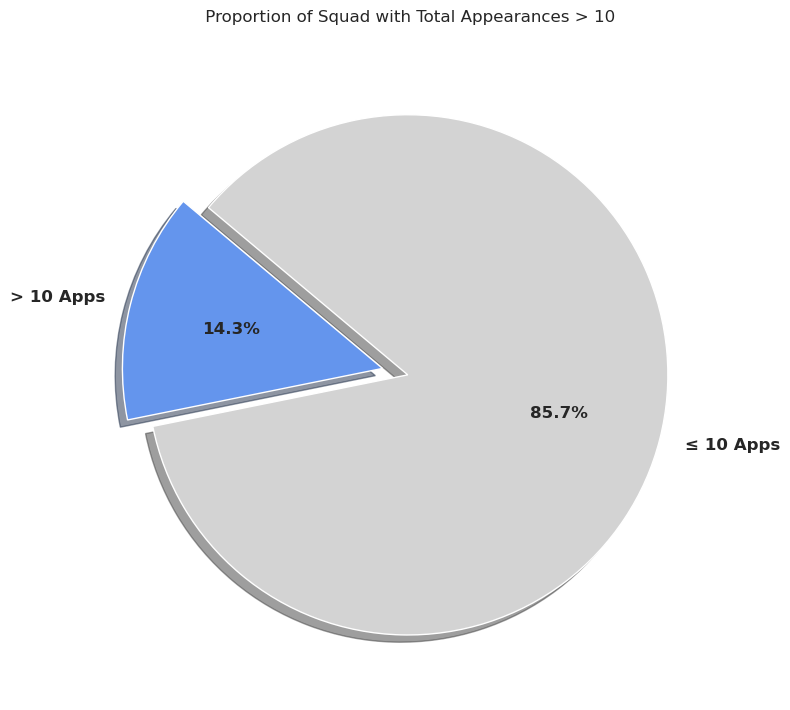

In [37]:


THRESHOLD = 10
players_above = df_stats[df_stats['Total Apps'] > THRESHOLD].shape[0]
players_below = df_stats[df_stats['Total Apps'] <= THRESHOLD].shape[0]
total_players = df_stats.shape[0]
proportion_above = players_above / total_players * 100

print(f"\n--- Question 4: Proportion of Squad > {THRESHOLD} Apps ---")
print(f"Total Players: {total_players}")
print(f"Players with > {THRESHOLD} Total Apps: {players_above}")
print(f"Proportion of players with > {THRESHOLD} Total Apps: {proportion_above:.2f}%")

plt.figure(figsize=(8, 8))
pie_data = pd.Series([players_above, players_below], index=[f'> {THRESHOLD} Apps', f'≤ {THRESHOLD} Apps'])
labels = pie_data.index
sizes = pie_data.values
colors = ['cornflowerblue', 'lightgray']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,
        textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title(f' Proportion of Squad with Total Appearances > {THRESHOLD}', pad=20)
plt.tight_layout()
plt.show

_This plot shows the porportion of what percentage of players played more than 10 games vs less than 10 games._
